In [1]:
import matplotlib.pyplot as plt
# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
import minpy.numpy as np
import os, pickle
import utils
name, model_setting, solver_setting = pickle.load(open('Log/mlp-relu_setting.pkl', 'rb'))
dirs = 'Log/' + name
activation_record = []
parameter_record = []
for epoch in range(solver_setting['epoch']):
    activation_record.append(pickle.load(open('%s/%s-epoch-%d_activation.pkl' % (dirs, name, epoch), 'rb')))
    parameter_record.append(pickle.load(open('%s/%s-epoch-%d_parameter.pkl' % (dirs, name, epoch), 'rb')))

layer_mean = {'fc1':[],'ac1':[],'fc2':[],'ac2':[],'fc3':[]}
layer_deviation = {'fc1':[],'ac1':[],'fc2':[],'ac2':[],'fc3':[]}
layer_sparsity = {'fc1':[],'ac1':[],'fc2':[],'ac2':[],'fc3':[]}
layer_deactivated = {'ac1':np.zeros(activation_record[0]['ac1'].shape), 
                     'ac2':np.zeros(activation_record[0]['ac2'].shape)}
for layer in activation_record:
    layer_mean['fc1'].append(utils.get_mean(layer['fc1']))
    layer_deviation['fc1'].append(utils.get_std_deviation(layer['fc1']))
    layer_sparsity['fc1'].append(utils.get_sparsity(layer['fc1']))
    
    layer_mean['ac1'].append(utils.get_mean(layer['ac1']))
    layer_deviation['ac1'].append(utils.get_std_deviation(layer['ac1']))
    layer_sparsity['ac1'].append(utils.get_sparsity(layer['ac1']))
    layer_deactivated['ac1'][layer['ac1'] == 0] += 1
    
    layer_mean['fc2'].append(utils.get_mean(layer['fc2']))
    layer_deviation['fc2'].append(utils.get_std_deviation(layer['fc2']))
    layer_sparsity['fc2'].append(utils.get_sparsity(layer['fc2']))
    
    layer_mean['ac2'].append(utils.get_mean(layer['ac2']))
    layer_deviation['ac2'].append(utils.get_std_deviation(layer['ac2']))
    layer_sparsity['ac2'].append(utils.get_sparsity(layer['ac2']))
    layer_deactivated['ac2'][layer['ac2'] == 0] += 1
    
    layer_mean['fc3'].append(utils.get_mean(layer['fc3']))
    layer_deviation['fc3'].append(utils.get_std_deviation(layer['fc3']))
    layer_sparsity['fc3'].append(utils.get_sparsity(layer['fc3']))

loss_record = pickle.load(open('%s/%s_loss.pkl' % (dirs, name), 'rb'))
num_batch = len(loss_record)
num_epoch = solver_setting['epoch']

I0714 21:05:06 14989 minpy.numpy.random:__init__:30] Initialize module: minpy.numpy.random.
I0714 21:05:06 14989 minpy.numpy.random:__init__:38] Importing from minpy.array_variants.numpy.random.
I0714 21:05:06 14989 minpy.numpy.random:__init__:45] Got 53 primitives from minpy.array_variants.numpy.random
I0714 21:05:06 14989 minpy.numpy.random:__init__:38] Importing from minpy.array_variants.mxnet.random.
I0714 21:05:06 14989 minpy.numpy.random:__init__:45] Got 2 primitives from minpy.array_variants.mxnet.random
I0714 21:05:06 14989 minpy.numpy.random:__init__:50] Import 55 primitives
I0714 21:05:06 14989 minpy.numpy:__init__:30] Initialize module: minpy.numpy.
I0714 21:05:06 14989 minpy.numpy:__init__:38] Importing from minpy.array_variants.numpy.
I0714 21:05:06 14989 minpy.numpy:__init__:45] Got 396 primitives from minpy.array_variants.numpy
I0714 21:05:06 14989 minpy.numpy:__init__:38] Importing from minpy.array_variants.mxnet.
I0714 21:05:06 14989 minpy.numpy:__init__:45] Got 36 pri

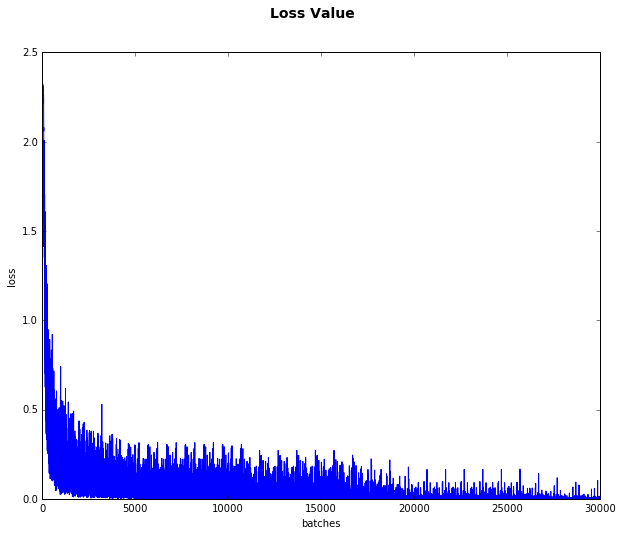

In [3]:
# Loss
plt.plot(range(num_batch), loss_record)
plt.suptitle('Loss Value', fontsize=14, fontweight='bold')
plt.xlabel('batches')
plt.ylabel('loss')

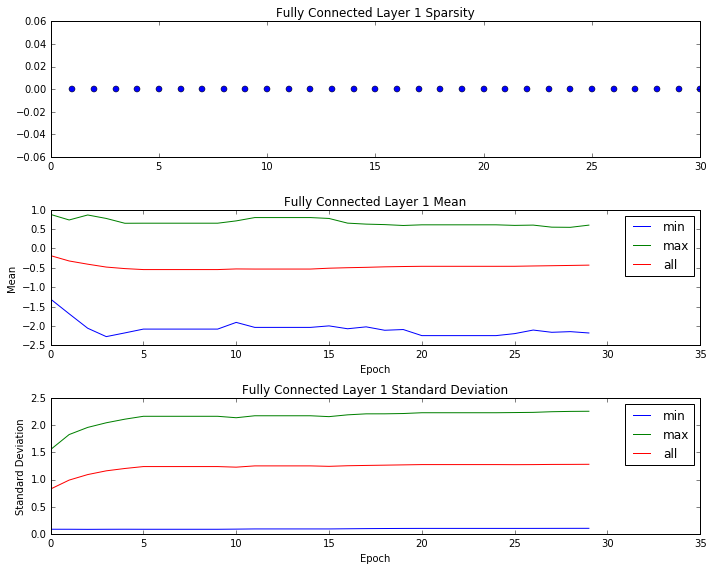

In [4]:
#Fully Connected Layer 1
n = 3
#Sparsity
plt.subplot(n, 1, 1)
plt.plot(range(1, len(layer_sparsity['fc1']) + 1), layer_sparsity['fc1'], 'bo')
plt.title('Fully Connected Layer 1 Sparsity')

#Mean
plt.subplot(n, 1, 2)
plt.plot(range(num_epoch), [mean[0] for mean in layer_mean['fc1']], label='min')
plt.plot(range(num_epoch), [mean[1] for mean in layer_mean['fc1']], label='max')
plt.plot(range(num_epoch), [mean[2] for mean in layer_mean['fc1']], label='all')
plt.xlabel('Epoch')
plt.ylabel('Mean')
plt.title('Fully Connected Layer 1 Mean')
plt.xlim(0, num_epoch + 5)
plt.legend()

#Standard Deviation
plt.subplot(n, 1, 3)
plt.plot(range(num_epoch), [deviation[0] for deviation in layer_deviation['fc1']], label='min')
plt.plot(range(num_epoch), [deviation[1] for deviation in layer_deviation['fc1']], label='max')
plt.plot(range(num_epoch), [deviation[2] for deviation in layer_deviation['fc1']], label='all')
plt.xlabel('Epoch')
plt.ylabel('Standard Deviation')
plt.title('Fully Connected Layer 1 Standard Deviation')
plt.xlim(0, num_epoch + 5)
plt.legend()

plt.tight_layout()

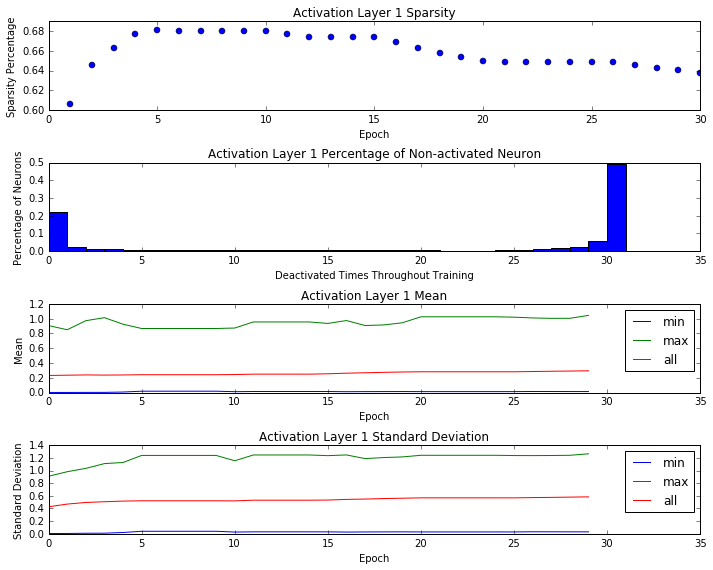

In [5]:
#Activation Layer 1
n = 4
#Sparsity
plt.subplot(n, 1, 1)
plt.plot(range(1, len(layer_sparsity['ac1']) + 1), layer_sparsity['ac1'], 'bo')
plt.title('Activation Layer 1 Sparsity')
plt.xlabel('Epoch')
plt.ylabel('Sparsity Percentage')

# Neuron Death Rate
plt.subplot(n, 1, 2)
plt.bar(range(num_epoch + 1), utils.get_deactivated_scale(layer_deactivated['ac1'], num_epoch), width=1)
plt.title('Activation Layer 1 Percentage of Non-activated Neuron')
plt.xlabel('Deactivated Times Throughout Training')
plt.ylabel('Percentage of Neurons')

#Mean
plt.subplot(n, 1, 3)
plt.plot(range(num_epoch), [mean[0] for mean in layer_mean['ac1']], label='min')
plt.plot(range(num_epoch), [mean[1] for mean in layer_mean['ac1']], label='max')
plt.plot(range(num_epoch), [mean[2] for mean in layer_mean['ac1']], label='all')
plt.xlabel('Epoch')
plt.ylabel('Mean')
plt.title('Activation Layer 1 Mean')
plt.xlim(0, num_epoch + 5)
plt.legend()

#Standard Deviation
plt.subplot(n, 1, 4)
plt.plot(range(num_epoch), [deviation[0] for deviation in layer_deviation['ac1']], label='min')
plt.plot(range(num_epoch), [deviation[1] for deviation in layer_deviation['ac1']], label='max')
plt.plot(range(num_epoch), [deviation[2] for deviation in layer_deviation['ac1']], label='all')
plt.xlabel('Epoch')
plt.ylabel('Standard Deviation')
plt.title('Activation Layer 1 Standard Deviation')
plt.xlim(0, num_epoch + 5)
plt.legend()

plt.tight_layout()

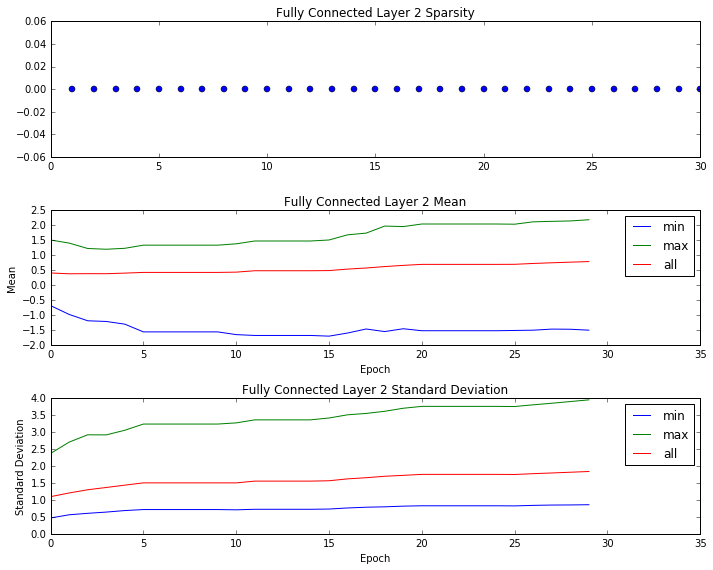

In [6]:
#Fully Connected Layer 2
n = 3
#sparsity
plt.subplot(n, 1, 1)
plt.plot(range(1, len(layer_sparsity['fc2']) + 1), layer_sparsity['fc2'], 'bo')
plt.title('Fully Connected Layer 2 Sparsity')

#Mean
plt.subplot(n, 1, 2)
plt.plot(range(num_epoch), [mean[0] for mean in layer_mean['fc2']], label='min')
plt.plot(range(num_epoch), [mean[1] for mean in layer_mean['fc2']], label='max')
plt.plot(range(num_epoch), [mean[2] for mean in layer_mean['fc2']], label='all')
plt.xlabel('Epoch')
plt.ylabel('Mean')
plt.title('Fully Connected Layer 2 Mean')
plt.xlim(0, num_epoch + 5)
plt.legend()

#Standard Deviation
plt.subplot(n, 1, 3)
plt.plot(range(num_epoch), [deviation[0] for deviation in layer_deviation['fc2']], label='min')
plt.plot(range(num_epoch), [deviation[1] for deviation in layer_deviation['fc2']], label='max')
plt.plot(range(num_epoch), [deviation[2] for deviation in layer_deviation['fc2']], label='all')
plt.xlabel('Epoch')
plt.ylabel('Standard Deviation')
plt.title('Fully Connected Layer 2 Standard Deviation')
plt.xlim(0, num_epoch + 5)
plt.legend()

plt.tight_layout()

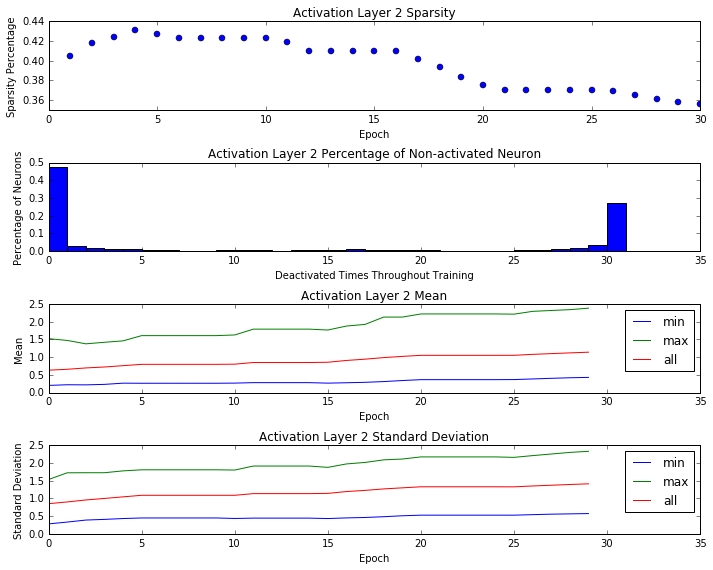

In [7]:
#Activation Layer 2
n = 4
#sparsity
plt.subplot(n, 1, 1)
plt.plot(range(1, len(layer_sparsity['ac2']) + 1), layer_sparsity['ac2'], 'bo')
plt.title('Activation Layer 2 Sparsity')
plt.xlabel('Epoch')
plt.ylabel('Sparsity Percentage')

# Neuron Death Rate
plt.subplot(n, 1, 2)
plt.bar(range(num_epoch + 1), utils.get_deactivated_scale(layer_deactivated['ac2'], num_epoch), width=1)
plt.title('Activation Layer 2 Percentage of Non-activated Neuron')
plt.xlabel('Deactivated Times Throughout Training')
plt.ylabel('Percentage of Neurons')

#Mean
plt.subplot(n, 1, 3)
plt.plot(range(num_epoch), [mean[0] for mean in layer_mean['ac2']], label='min')
plt.plot(range(num_epoch), [mean[1] for mean in layer_mean['ac2']], label='max')
plt.plot(range(num_epoch), [mean[2] for mean in layer_mean['ac2']], label='all')
plt.xlabel('Epoch')
plt.ylabel('Mean')
plt.title('Activation Layer 2 Mean')
plt.xlim(0, num_epoch + 5)
plt.legend()

#Standard Deviation
plt.subplot(n, 1, 4)
plt.plot(range(num_epoch), [deviation[0] for deviation in layer_deviation['ac2']], label='min')
plt.plot(range(num_epoch), [deviation[1] for deviation in layer_deviation['ac2']], label='max')
plt.plot(range(num_epoch), [deviation[2] for deviation in layer_deviation['ac2']], label='all')
plt.xlabel('Epoch')
plt.ylabel('Standard Deviation')
plt.title('Activation Layer 2 Standard Deviation')
plt.xlim(0, num_epoch + 5)
plt.legend()

plt.tight_layout()

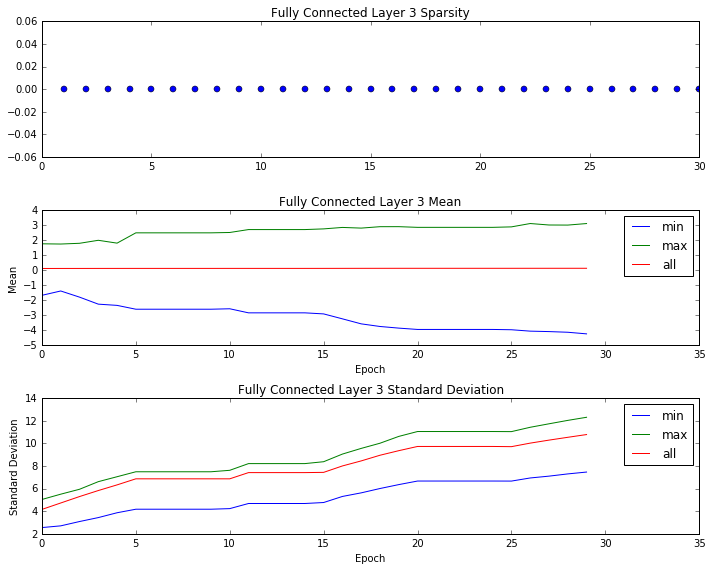

In [8]:
#Fully Connected Layer 3
n = 3
#sparsity
plt.subplot(n, 1, 1)
plt.plot(range(1, len(layer_sparsity['fc3']) + 1), layer_sparsity['fc3'], 'bo')
plt.title('Fully Connected Layer 3 Sparsity')

#Mean
plt.subplot(n, 1, 2)
plt.plot(range(num_epoch), [mean[0] for mean in layer_mean['fc3']], label='min')
plt.plot(range(num_epoch), [mean[1] for mean in layer_mean['fc3']], label='max')
plt.plot(range(num_epoch), [mean[2] for mean in layer_mean['fc3']], label='all')
plt.xlabel('Epoch')
plt.ylabel('Mean')
plt.title('Fully Connected Layer 3 Mean')
plt.xlim(0, num_epoch + 5)
plt.legend()

#Standard Deviation
plt.subplot(n, 1, 3)
plt.plot(range(num_epoch), [deviation[0] for deviation in layer_deviation['fc3']], label='min')
plt.plot(range(num_epoch), [deviation[1] for deviation in layer_deviation['fc3']], label='max')
plt.plot(range(num_epoch), [deviation[2] for deviation in layer_deviation['fc3']], label='all')
plt.xlabel('Epoch')
plt.ylabel('Standard Deviation')
plt.title('Fully Connected Layer 3 Standard Deviation')
plt.xlim(0, num_epoch + 5)
plt.legend()

plt.tight_layout()

In [9]:
print 'Program Over Flag'

Program Over Flag
